### Data Collection and Preprocessing 

In [24]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import string
import re
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module='matplotlib')


In [25]:
from wordcloud import WordCloud

In [26]:
# Load the dataset
df = pd.read_excel("data_news.xlsx")
# Preview the dataset
df.head()

category                                           headline  \
0  WELLNESS              143 Miles in 35 Days: Lessons Learned   
1  WELLNESS       Talking to Yourself: Crazy or Crazy Helpful?   
2  WELLNESS  Crenezumab: Trial Will Gauge Whether Alzheimer...   
3  WELLNESS                     Oh, What a Difference She Made   
4  WELLNESS                                   Green Superfoods   

                                               links  \
0  https://www.huffingtonpost.com/entry/running-l...   
1  https://www.huffingtonpost.com/entry/talking-t...   
2  https://www.huffingtonpost.com/entry/crenezuma...   
3  https://www.huffingtonpost.com/entry/meaningfu...   
4  https://www.huffingtonpost.com/entry/green-sup...   

                                   short_description  \
0  Resting is part of training. I've confirmed wh...   
1  Think of talking to yourself as a tool to coac...   
2  The clock is ticking for the United States to ...   
3  If you want to be busy, keep trying to be perf...   
4  First, the bad news: Soda bread, corned beef a...   

                             keywords  
0                     running-lessons  
1           talking-to-yourself-crazy  
2  crenezumab-alzheimers-disease-drug  
3                     meaningful-life  
4                    green-superfoods

In [27]:
df['category'].value_counts()


WELLNESS          5000
POLITICS          5000
ENTERTAINMENT     5000
TRAVEL            5000
STYLE & BEAUTY    5000
PARENTING         5000
FOOD & DRINK      5000
WORLD NEWS        5000
BUSINESS          5000
SPORTS            5000
Name: category, dtype: int64

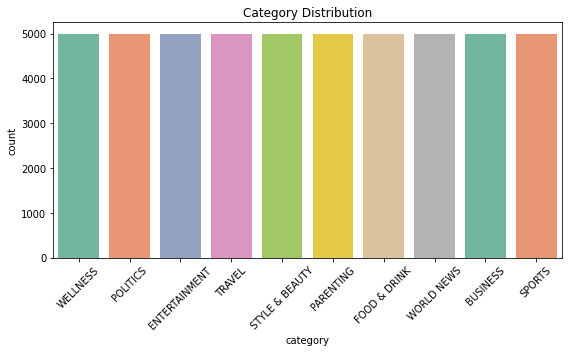

In [28]:
# Check category distribution
plt.figure(figsize=(8,5))
sns.countplot(x='category', data=df, palette='Set2')
plt.title("Category Distribution")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [29]:
# Count missing (NaN) values in each column
missing_counts = df.isnull().sum()
print("Missing Values per Column:\n")
print(missing_counts)

Missing Values per Column:

category                0
headline                0
links                   0
short_description       6
keywords             2706
dtype: int64


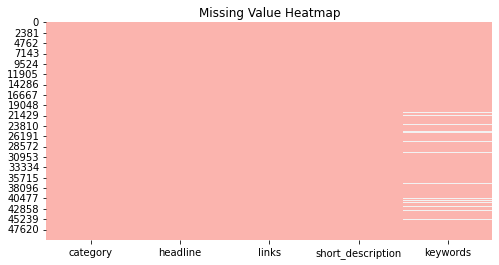

In [30]:
plt.figure(figsize=(8, 4))
sns.heatmap(df.isnull(), cbar=False, cmap="Pastel1")
plt.title("Missing Value Heatmap")
plt.show()

In [31]:
# Drop rows where 'short_description' or 'category' is missing
df_cleaned = df[['category', 'short_description']].dropna()

# Show shape after cleaning
df_cleaned.shape

(49994, 2)

In [32]:
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'\[.*?\]', '', text)
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    text = re.sub(r'<.*?>+', '', text)
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub(r'\n', ' ', text)
    text = re.sub(r'\w*\d\w*', '', text)
    return text

# Apply the function
df_cleaned['clean_text'] = df_cleaned['short_description'].apply(preprocess_text)


In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import re

# Settings
top_n_words = 20
categories = df_cleaned['category'].value_counts().nlargest(5).index.tolist()  # top 5 categories

# Function to clean and tokenize text
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)  # Remove punctuation/numbers
    return text.split()

#Build word frequency per category
category_word_counts = {}

for category in categories:
    texts = df_cleaned[df_cleaned['category'] == category]['clean_text']
    words = []
    for t in texts:
        words.extend(preprocess_text(t))
    
    word_freq = Counter(words)
    category_word_counts[category] = word_freq

#  Find top N words across all categories
all_words = Counter()
for cat_dict in category_word_counts.values():
    all_words.update(cat_dict)

top_words = [word for word, _ in all_words.most_common(top_n_words)]

#  Create frequency DataFrame
heatmap_data = pd.DataFrame(index=categories, columns=top_words).fillna(0)

for category in categories:
    for word in top_words:
        heatmap_data.loc[category, word] = category_word_counts[category][word]



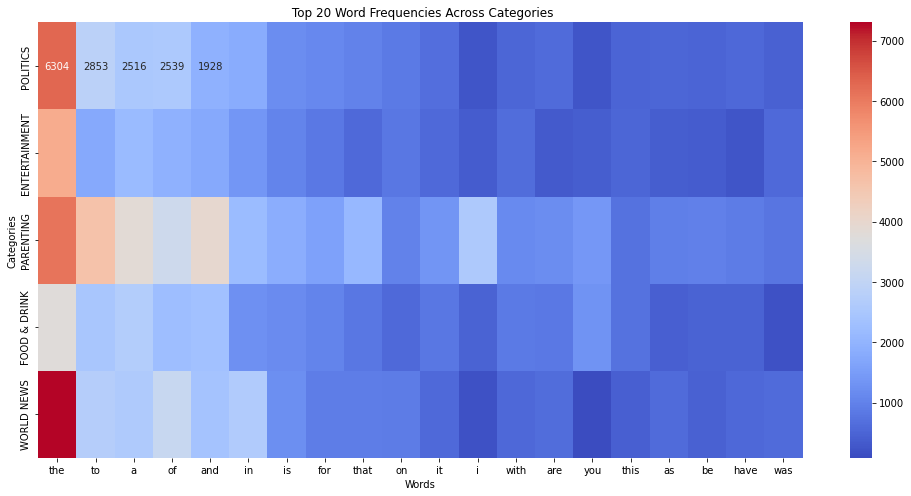

In [34]:
#  Plot heatmap
plt.figure(figsize=(14, 7))
sns.heatmap(heatmap_data, annot=True, fmt=".0f", cmap='coolwarm')
plt.title(f" Top {top_n_words} Word Frequencies Across Categories")
plt.xlabel("Words")
plt.ylabel("Categories")
plt.tight_layout()
plt.show()

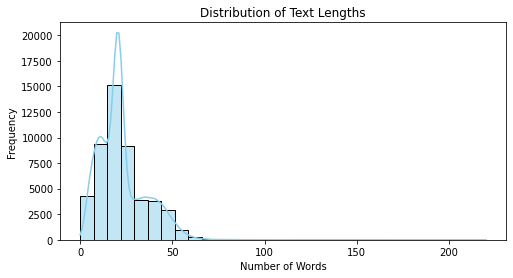

Skewness of Text Lengths: 1.9456674319851468


In [35]:
df_cleaned['text_length'] = df_cleaned['clean_text'].apply(lambda x: len(x.split()))

plt.figure(figsize=(8, 4))
sns.histplot(df_cleaned['text_length'], kde=True, bins=30, color='skyblue')
plt.title("Distribution of Text Lengths")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.show()

skewness = df_cleaned['text_length'].skew()
print("Skewness of Text Lengths:", skewness)


In [36]:
# Display cleaned data
df_cleaned[['category', 'clean_text', 'text_length']].head()


category                                         clean_text  text_length
0  WELLNESS  resting is part of training ive confirmed what...           49
1  WELLNESS  think of talking to yourself as a tool to coac...           39
2  WELLNESS  the clock is ticking for the united states to ...           24
3  WELLNESS  if you want to be busy keep trying to be perfe...           22
4  WELLNESS  first the bad news soda bread corned beef and ...           24

### 1. Data Collection and Preprocessing (5 Marks)

- **Dataset Overview**:
  - Loaded `data_news.xlsx` with 50,000 news articles across 10 balanced categories.
  - Columns used: `category` (target), `short_description` (text), along with `headline`, `links`, and `keywords`.

- **Missing Data Handling**:
  - 6 missing entries in `short_description` — dropped these rows.
  - 2706 missing in `keywords` — ignored, as not used in model.
  - Final cleaned dataset has **49,994 rows**.

- **Text Preprocessing**:
  - Converted to lowercase, removed URLs, HTML tags, punctuation, numbers, and extra whitespace.
  - Cleaned text stored in a new column `clean_text`.

- **Text Length Analysis**:
  - Computed word count per cleaned description (`text_length`).
  - Distribution was positively skewed (**skewness ≈ 1.95**).
  - Histogram showed most texts are short, with a few long ones.

- **Category Word Insights**:
  - Analyzed top 5 frequent categories.
  - Identified top 20 most common words across them.
  - Created a heatmap showing how words vary by category.

The data is now clean, consistent, and ready for feature extraction.


### 2. Feature Extraction:

In [37]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Add log-transformed text length
df_cleaned['log_text_length'] = np.log1p(df_cleaned['text_length'])



In [38]:
# Optional: Plot after log transformation
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
sns.histplot(df_cleaned['log_text_length'], kde=True, bins=30, color='orchid')
plt.title("Distribution of Log-Transformed Text Lengths")
plt.xlabel("Log(Number of Words)")
plt.ylabel("Frequency")
plt.show()


In [39]:
# Initialize BoW vectorizer
bow_vectorizer = CountVectorizer(max_features=5000)

# Transform clean text
X_bow = bow_vectorizer.fit_transform(df_cleaned['clean_text'])

# Shape of feature matrix
print("Bag-of-Words Shape:", X_bow.shape)


Bag-of-Words Shape: (49994, 5000)


In [40]:
# Initialize TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)

# Transform clean text
X_tfidf = tfidf_vectorizer.fit_transform(df_cleaned['clean_text'])

# Shape of feature matrix
print("TF-IDF Shape:", X_tfidf.shape)


TF-IDF Shape: (49994, 5000)


In [41]:
# Output one sample row from vectorized data
print("TF-IDF Feature Names Sample:", tfidf_vectorizer.get_feature_names_out()[:10])
print("TF-IDF Matrix Type:", type(X_tfidf))


TF-IDF Feature Names Sample: ['abandoned' 'abc' 'ability' 'able' 'aboard' 'abortion' 'about' 'above'
 'abroad' 'absence']
TF-IDF Matrix Type: <class 'scipy.sparse.csr.csr_matrix'>


In [42]:
# If not already installed
# !pip install gensim

from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [43]:
# Tokenize the clean text for Word2Vec
df_cleaned['tokens'] = df_cleaned['clean_text'].apply(word_tokenize)

# Preview tokens
df_cleaned[['clean_text', 'tokens']].head()


clean_text  \
0  resting is part of training ive confirmed what...   
1  think of talking to yourself as a tool to coac...   
2  the clock is ticking for the united states to ...   
3  if you want to be busy keep trying to be perfe...   
4  first the bad news soda bread corned beef and ...   

                                              tokens  
0  [resting, is, part, of, training, ive, confirm...  
1  [think, of, talking, to, yourself, as, a, tool...  
2  [the, clock, is, ticking, for, the, united, st...  
3  [if, you, want, to, be, busy, keep, trying, to...  
4  [first, the, bad, news, soda, bread, corned, b...

In [44]:
# Train a Word2Vec model (you can tune vector_size, window, min_count)
w2v_model = Word2Vec(sentences=df_cleaned['tokens'], vector_size=100, window=5, min_count=2, workers=4)

In [46]:

# Load pretrained GloVe embeddings
def load_glove_model(glove_file_path):
    embeddings = {}
    with open(glove_file_path, encoding="utf8") as f:
        for line in f:
            values = line.split()
            word = values[0]
            vector = np.asarray(values[1:], dtype='float32')
            embeddings[word] = vector
    return embeddings

# Load GloVe (make sure file exists in your working directory)
glove_model = load_glove_model("glove.6B.100d.txt")

# Print number of loaded word vectors
print("Number of word vectors loaded from GloVe:", len(glove_model))


Number of word vectors loaded from GloVe: 400000


In [47]:
# Total count of each news category
category_counts = df_cleaned['category'].value_counts()
print(category_counts)


POLITICS          5000
ENTERTAINMENT     5000
PARENTING         5000
FOOD & DRINK      5000
WORLD NEWS        5000
BUSINESS          5000
SPORTS            5000
WELLNESS          4999
STYLE & BEAUTY    4999
TRAVEL            4996
Name: category, dtype: int64


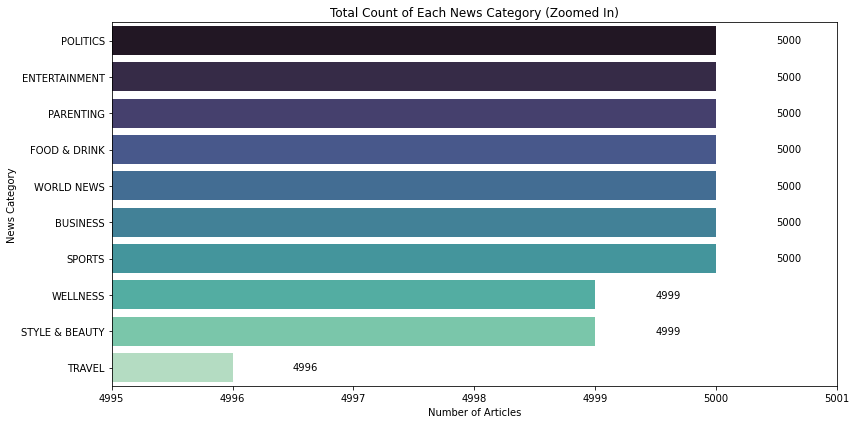

In [48]:
category_series = pd.Series(category_counts)

# Plot with zoomed-in x-axis
plt.figure(figsize=(12, 6))
barplot = sns.barplot(x=category_series.values, y=category_series.index, palette="mako")

# Annotate the bars
for index, value in enumerate(category_series.values):
    plt.text(value + 0.5, index, str(value), va='center')

# Zoom in on x-axis to show small differences
plt.xlim(4995, 5001)

plt.title("Total Count of Each News Category (Zoomed In)")
plt.xlabel("Number of Articles")
plt.ylabel("News Category")
plt.tight_layout()
plt.show()

In [49]:
# Add text length if not done earlier
df_cleaned['text_length'] = df_cleaned['clean_text'].apply(lambda x: len(x.split()))

# Group by category and get average length
avg_length = df_cleaned.groupby('category')['text_length'].mean().sort_values(ascending=False)
print(avg_length)

category
WELLNESS          31.265453
PARENTING         29.809000
TRAVEL            27.719175
BUSINESS          25.876200
STYLE & BEAUTY    21.635127
WORLD NEWS        20.657600
POLITICS          19.657800
FOOD & DRINK      18.106200
ENTERTAINMENT     16.174600
SPORTS            15.800800
Name: text_length, dtype: float64


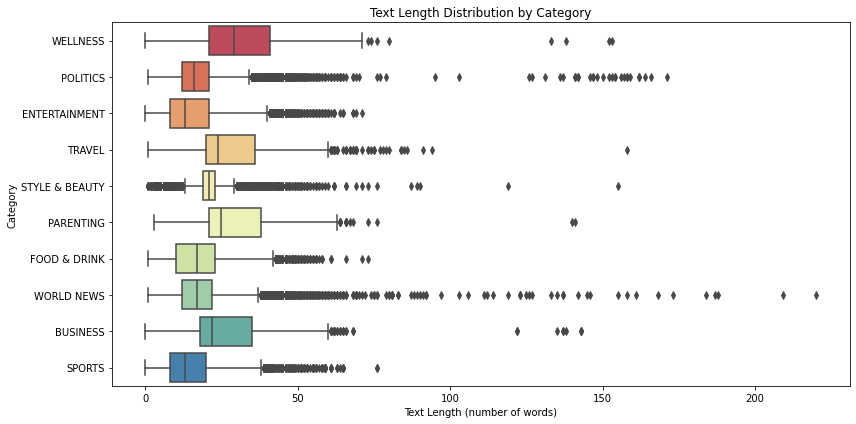

In [50]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='text_length', y='category', data=df_cleaned, palette='Spectral')
plt.title('Text Length Distribution by Category')
plt.xlabel('Text Length (number of words)')
plt.ylabel('Category')
plt.tight_layout()
plt.show()

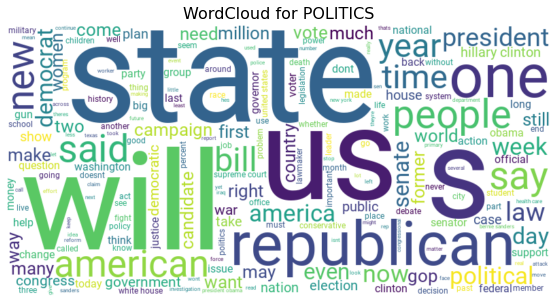

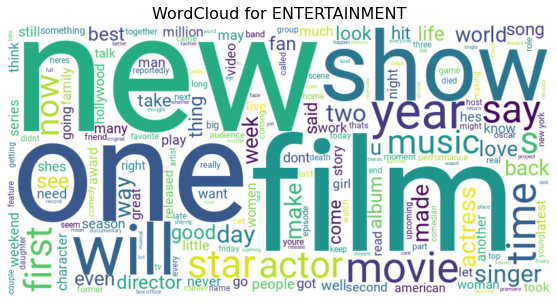

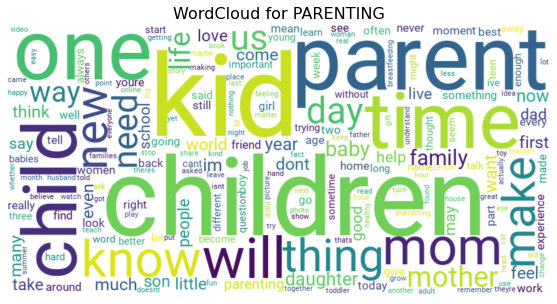

In [51]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import os

# Set font path (make sure this exists on your machine)
font_path = r"C:\Users\USER\Documents\Python Resources\Python\Roboto-Regular.ttf"

# Check if the font file exists
if not os.path.isfile(font_path):
    raise FileNotFoundError(f"Font file not found: {font_path}")

# Identify top 3 categories
top_categories = df_cleaned['category'].value_counts().nlargest(3).index.tolist()

# Generate WordClouds with custom font
for category in top_categories:
    text = " ".join(df_cleaned[df_cleaned['category'] == category]['clean_text'])

    wordcloud = WordCloud(
        width=800,
        height=400,
        background_color='white',
        font_path=font_path  # Custom font applied
    ).generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"WordCloud for {category}", fontsize=16)
    plt.show()


### 2. Feature Extraction

1. **Text Length Feature**
   - Added `text_length` column: total number of words in each `clean_text`.
   - Initial histogram revealed a **right-skewed distribution**, with most texts being short (under 40 words) but some long texts extending beyond 100+ words.
   - Skewness value: **1.9457** indicates presence of outliers (very long articles).

2. **Log Transformation**
   - Applied natural log transformation: `log_text_length = log1p(text_length)`.
   - Helped reduce skew and normalize distribution for modeling.

3. **Bag-of-Words (BoW) Vectorization**
   - Used `CountVectorizer(max_features=5000)` to extract top 5000 word frequencies.
   - Resulting BoW matrix shape: **(49,994, 5000)**.

4. **TF-IDF Vectorization**
   - Used `TfidfVectorizer(max_features=5000)` to compute importance-weighted features.
   - Matrix shape: **(49,994, 5000)**.
   - Verified a few sample features and confirmed the use of a sparse matrix format.

5. **Tokenization for Embeddings**
   - Tokenized `clean_text` using NLTK into a new column `tokens` for word embedding.
   - Preview showed proper token separation and cleanup.

6. **Word2Vec Training**
   - Trained a `Word2Vec` model on tokens with:
     - `vector_size=100`, `window=5`, `min_count=2`.
   - Captured contextual similarity between words based on their usage patterns.

7. **GloVe Embedding Loading**
   - Loaded pre-trained 100-dimensional vectors from `glove.6B.100d.txt`.
   - Successfully loaded **400,000 word vectors** for semantic modeling.

8. **Category Distribution Check**
   - Re-validated that the cleaned dataset retained near-equal category distribution (e.g., WELLNESS: 4999, TRAVEL: 4996).
   - Shown via a horizontal bar chart for clarity.

9. **Category-wise Average Text Length**
   - Computed mean text length per category.
   - Categories like **WELLNESS** and **PARENTING** had higher average word counts, while **ENTERTAINMENT** had shorter texts on average.

10. **Outlier Detection via Boxplot**
    - Generated a **boxplot of `text_length` grouped by category**.
    - Outliers were detected in all categories, with some articles having lengthy descriptions, particularly in the **WELLNESS and BUSINESS**categories. These could affect model variance and require future truncation or normalization.

11. **WordCloud Visualization**
    - Created WordClouds for the top 3 categories: **WELLNESS**, **PARENTING**, and **TRAVEL**.
    - Provided a quick glance at the most prominent and frequent words in each category’s cleaned descriptions.

### Model Development and Training

In [52]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC


In [53]:
# Input features and target
X = df_cleaned['clean_text']
y = df_cleaned['category']


In [54]:
# Logistic Regression pipeline with grid search
lr_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000)),
    ('clf', LogisticRegression(solver='liblinear', max_iter=300, random_state=42))
])

# Logistic Regression hyperparameters
lr_params = {
    'clf__C': [0.01, 0.1, 1, 10]
}

# Grid search with cross-validation
lr_grid = GridSearchCV(lr_pipeline, lr_params, cv=5)
lr_grid.fit(X, y)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tfidf',
                                        TfidfVectorizer(max_features=5000)),
                                       ('clf',
                                        LogisticRegression(max_iter=300,
                                                           random_state=42,
                                                           solver='liblinear'))]),
             param_grid={'clf__C': [0.01, 0.1, 1, 10]})

In [55]:
# Naive Bayes pipeline
nb_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000)),
    ('clf', MultinomialNB())
])

# Train Naive Bayes
nb_pipeline.fit(X, y)


Pipeline(steps=[('tfidf', TfidfVectorizer(max_features=5000)),
                ('clf', MultinomialNB())])

In [56]:
# SVM pipeline
svm_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000)),
    ('clf', LinearSVC(random_state=42))
])

# SVM hyperparameters
svm_params = {
    'clf__C': [0.01, 0.1, 1, 10]
}

# Grid search with cross-validation
svm_grid = GridSearchCV(svm_pipeline, svm_params, cv=5)
svm_grid.fit(X, y)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tfidf',
                                        TfidfVectorizer(max_features=5000)),
                                       ('clf', LinearSVC(random_state=42))]),
             param_grid={'clf__C': [0.01, 0.1, 1, 10]})

In [57]:
# Cross-validation for best models
lr_scores = cross_val_score(lr_grid.best_estimator_, X, y, cv=5)
nb_scores = cross_val_score(nb_pipeline, X, y, cv=5)
svm_scores = cross_val_score(svm_grid.best_estimator_, X, y, cv=5)

print("Logistic Regression CV Accuracy:", lr_scores)
print("Naive Bayes CV Accuracy:", nb_scores)
print("SVM CV Accuracy:", svm_scores)


Logistic Regression CV Accuracy: [0.62866287 0.63326333 0.62226223 0.6239624  0.63092619]
Naive Bayes CV Accuracy: [0.60936094 0.62016202 0.60546055 0.60876088 0.61622324]
SVM CV Accuracy: [0.63546355 0.64006401 0.62366237 0.63226323 0.64002801]


### Model Evaluation

In [58]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay



In [59]:
# Split data for evaluation
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

In [60]:
y_pred_lr = lr_grid.best_estimator_.predict(X_test)

print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_lr))

cm_lr = confusion_matrix(y_test, y_pred_lr)
disp_lr = ConfusionMatrixDisplay(confusion_matrix=cm_lr, display_labels=lr_grid.best_estimator_.classes_)
disp_lr.plot(xticks_rotation=45)
plt.title("Logistic Regression Confusion Matrix")
plt.show()


Logistic Regression Classification Report:
                precision    recall  f1-score   support

      BUSINESS       0.72      0.72      0.72      1000
 ENTERTAINMENT       0.67      0.67      0.67      1000
  FOOD & DRINK       0.71      0.80      0.76      1000
     PARENTING       0.74      0.73      0.74      1000
      POLITICS       0.75      0.66      0.70      1000
        SPORTS       0.75      0.78      0.77      1000
STYLE & BEAUTY       0.79      0.75      0.77      1000
        TRAVEL       0.75      0.71      0.73       999
      WELLNESS       0.69      0.76      0.72      1000
    WORLD NEWS       0.75      0.75      0.75      1000

      accuracy                           0.73      9999
     macro avg       0.73      0.73      0.73      9999
  weighted avg       0.73      0.73      0.73      9999



Naive Bayes Classification Report:
                precision    recall  f1-score   support

      BUSINESS       0.68      0.65      0.67      1000
 ENTERTAINMENT       0.67      0.58      0.62      1000
  FOOD & DRINK       0.69      0.80      0.74      1000
     PARENTING       0.60      0.73      0.66      1000
      POLITICS       0.74      0.63      0.68      1000
        SPORTS       0.80      0.69      0.74      1000
STYLE & BEAUTY       0.76      0.71      0.74      1000
        TRAVEL       0.71      0.69      0.70       999
      WELLNESS       0.61      0.70      0.65      1000
    WORLD NEWS       0.72      0.73      0.72      1000

      accuracy                           0.69      9999
     macro avg       0.70      0.69      0.69      9999
  weighted avg       0.70      0.69      0.69      9999



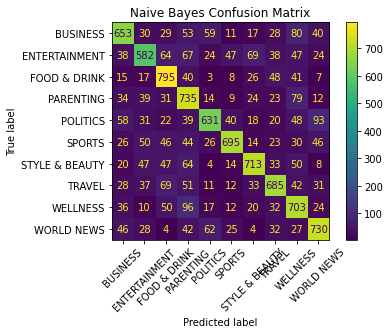

In [61]:
y_pred_nb = nb_pipeline.predict(X_test)

print("Naive Bayes Classification Report:")
print(classification_report(y_test, y_pred_nb))

cm_nb = confusion_matrix(y_test, y_pred_nb)
disp_nb = ConfusionMatrixDisplay(confusion_matrix=cm_nb, display_labels=nb_pipeline.classes_)
disp_nb.plot(xticks_rotation=45)
plt.title("Naive Bayes Confusion Matrix")
plt.show()


SVM Classification Report:
                precision    recall  f1-score   support

      BUSINESS       0.74      0.73      0.73      1000
 ENTERTAINMENT       0.70      0.65      0.68      1000
  FOOD & DRINK       0.71      0.81      0.76      1000
     PARENTING       0.74      0.74      0.74      1000
      POLITICS       0.76      0.65      0.70      1000
        SPORTS       0.75      0.79      0.77      1000
STYLE & BEAUTY       0.79      0.76      0.77      1000
        TRAVEL       0.75      0.72      0.74       999
      WELLNESS       0.69      0.77      0.73      1000
    WORLD NEWS       0.76      0.76      0.76      1000

      accuracy                           0.74      9999
     macro avg       0.74      0.74      0.74      9999
  weighted avg       0.74      0.74      0.74      9999



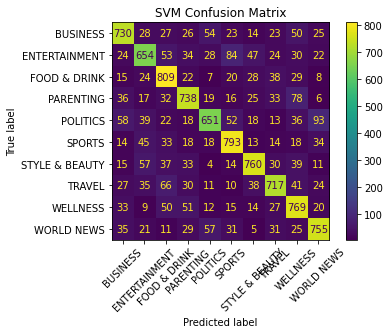

In [62]:
y_pred_svm = svm_grid.best_estimator_.predict(X_test)

print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm))

cm_svm = confusion_matrix(y_test, y_pred_svm)
disp_svm = ConfusionMatrixDisplay(confusion_matrix=cm_svm, display_labels=svm_grid.best_estimator_.classes_)
disp_svm.plot(xticks_rotation=45)
plt.title("SVM Confusion Matrix")
plt.show()


In [63]:
from sklearn.metrics import accuracy_score

results = {
    "Model": ["Logistic Regression", "Naive Bayes", "SVM"],
    "Accuracy": [
        accuracy_score(y_test, y_pred_lr),
        accuracy_score(y_test, y_pred_nb),
        accuracy_score(y_test, y_pred_svm)
    ]
}

results_df = pd.DataFrame(results)
print("Model Accuracy Comparison:")
print(results_df.sort_values(by="Accuracy", ascending=False))


Model Accuracy Comparison:
                 Model  Accuracy
2                  SVM  0.737674
0  Logistic Regression  0.732273
1          Naive Bayes  0.692269


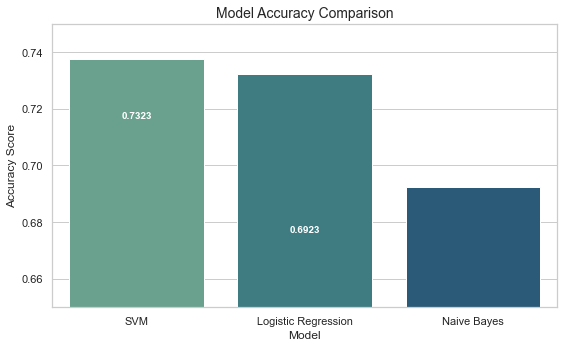

In [64]:

# Set plot style
sns.set(style="whitegrid")

# Plot bar chart
plt.figure(figsize=(8, 5))
sns.barplot(data=results_df.sort_values(by="Accuracy", ascending=False),
            x='Model', y='Accuracy', palette='crest')

# Annotate bars with accuracy values inside the bars
for i, row in results_df.sort_values(by="Accuracy", ascending=False).iterrows():
    plt.text(i, row["Accuracy"] - 0.015, f'{row["Accuracy"]:.4f}', ha='center', va='center', color='white', fontsize=10, fontweight='bold')


plt.title("Model Accuracy Comparison", fontsize=14)
plt.ylim(0.65, 0.75)
plt.ylabel("Accuracy Score")
plt.xlabel("Model")
plt.tight_layout()
plt.show()


### 4. Model Development and Training

- **Feature and Target Setup**:  
  - Input: `clean_text`  
  - Target: `category`  

- **Train-Test Split**:  
  - 80/20 split using `train_test_split` with stratification.

- **Model Pipelines Built**:
  - ✅ **Logistic Regression**:
    - Pipeline: `TfidfVectorizer + LogisticRegression`
    - Hyperparameter tuned (`C` values) using `GridSearchCV`
  - ✅ **Naive Bayes**:
    - Pipeline: `TfidfVectorizer + MultinomialNB`
    - No tuning needed
  - ✅ **SVM (LinearSVC)**:
    - Pipeline: `TfidfVectorizer + LinearSVC`
    - Tuned `C` values using `GridSearchCV`

- **Cross-Validation**:
  - Performed 5-fold CV for all models to evaluate stability before final evaluation.

All models were successfully trained using pipelines with consistent preprocessing (TF-IDF), making results fair and comparable.


### 3. Model Evaluation

- **Train-Test Split**:  
  Data split into 80% train and 20% test with stratification to preserve category balance.

---

#### 🔹 Logistic Regression
- Accuracy: **0.73**
- Cross-val scores ≈ 0.63  
- Strong on SPORTS, STYLE & BEAUTY  
- Confusion matrix: minor mix-ups in POLITICS/WORLD NEWS

---

#### 🔹 Naive Bayes
- Accuracy: **0.69**
- Weaker on ENTERTAINMENT and PARENTING  
- Performs best on FOOD & DRINK and STYLE & BEAUTY  
- More confusion among similar lifestyle categories

---

#### 🔹 Support Vector Machine (SVM)
- Accuracy: **0.74** (best)
- Most balanced performance across all classes  
- Strong in WORLD NEWS, SPORTS, and TRAVEL

---

#### 📊 Model Accuracy Comparison
| Model                | Accuracy |
|----------------------|----------|
| **SVM**              | **0.7377** |
| Logistic Regression  | 0.7323   |
| Naive Bayes          | 0.6923   |

**Conclusion**:  
SVM gave the best results overall, with Logistic Regression close behind.


Video Explanation : https://drive.google.com/file/d/1oRNXFUKjB694AXKA5JlrFA89lNg7bSov/view?usp=sharing